In [6]:
from typing import Tuple, Dict, Any, Optional, List
from collections import OrderedDict
import pyrogram.types
from pyrogram.types import Message, User, Chat, MessageReactions, Reaction
from pyrogram.enums import ChatType, MessageMediaType
import os
import pyrogram
from pymongo import MongoClient
from enum import Enum
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
NullFormatter = ticker.NullFormatter

MONGO_HOST="mongodb://127.0.0.1:27017/"
MONGO_INITDB_ROOT_USERNAME="root"
MONGO_INITDB_ROOT_PASSWORD="example"
MONGO_DATABASE="messages_new"

conn = MongoClient(MONGO_HOST, username=MONGO_INITDB_ROOT_USERNAME, password=MONGO_INITDB_ROOT_PASSWORD)
db = conn[MONGO_DATABASE]
messages = db["messages"]

In [9]:
messages.count_documents({
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        "$lt": datetime.datetime(2025, 1, 2)
    }
})

64230

In [63]:
cursor = messages.find({
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        #"$lt": datetime.datetime(2024, 1, 2)
    }
}, {"date": 1})

# Create a DataFrame from the cursor
df = pd.DataFrame(list(cursor)).drop(columns='_id')

# Ensure the 'date' field is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the datetime column as the DataFrame's index
df.set_index('date', inplace=True)

# Resample the data by week and count the number of entries
weekly_counts = df.resample('W').size().reset_index(name='cnt')


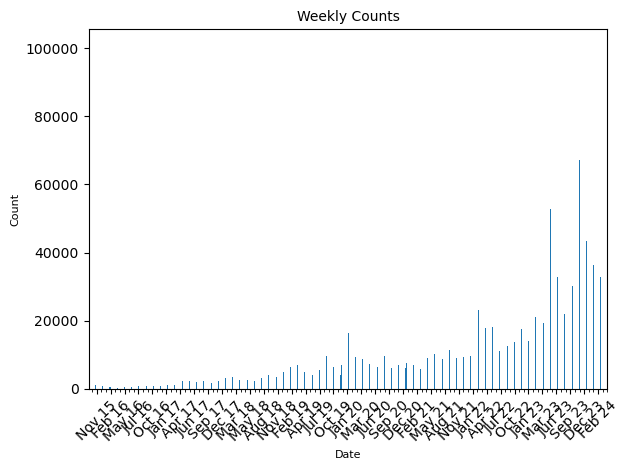

In [62]:
weekly_counts_trimmed = weekly_counts#[weekly_counts.date.dt.year >= 2024]
first_weekday = weekly_counts_trimmed.iloc[0].date.weekday()
plt.bar(weekly_counts_trimmed.date, weekly_counts_trimmed.cnt, width=1)
plt.xticks(rotation=45)

# Set the x-axis labels to display the first week of each quarter
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=first_weekday, interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=first_weekday, interval=4))
ax.xaxis.set_minor_formatter(NullFormatter())

plt.xlim(weekly_counts_trimmed.date.min(), weekly_counts_trimmed.date.max())

plt.title('Weekly Counts', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()